# <center>DSBA HSE Python Project for Living cost analysis</center>

## <center>by Andrey Bobua, 232-1</center>

### Let's firstly import all the neccessary libraries

In [288]:
import pandas as pd
import streamlit as st
import plotly.express as px

### Let's take a first look at our dataset

In [302]:
df_temp = pd.read_csv('cost-of-living_v2.csv')
df_temp

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,0.98,NaN,1.80,0.62,0.41,...,103.14,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0
4954,Iqaluit,Canada,29.65,74.27,13.71,6.67,8.89,3.71,3.52,4.08,...,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0


Link on this dataset: https://www.kaggle.com/datasets/mvieira101/global-cost-of-living?select=cost-of-living_v2.csv

### Seems like we have some extra data and unreadable names of columns, that's why we are to shorten our range of data, basing on our hypothesis, which gonna be stated later and rename our columns:

In [308]:
df = pd.read_csv('cost-of-living_v2.csv')
df = df[["city", "country", "x1", "x3", "x4", "x5", "x7", "x9", "x10", "x12", "x16", "x20", "x23", "x25", "x26","x27", "x38", "x44", "x46", "x49", "x54"]]
df.rename(columns = {"x1": "cheap_rest", "x3": "mcdonalds", "x4": "domestic_beer_rest", "x5": "imported_beer_rest",
                     "x25": "domestic_beer_market", "x26": "imported_beer_market", "x7": "coke", 
                    "x9": "milk", "x10": "bread", "x12": "eggs", "x16": "apple", "x20": "potato", "x23": "water", "x27": "cigarettes", 
                     "x38": "internet", "x44": "jeans", "x46": "nike_shoes", "x49": "apartment", "x54": "wage"},inplace=True)
df

,city,country,cheap_rest,mcdonalds,domestic_beer_rest,imported_beer_rest,coke,milk,bread,eggs,...,potato,water,domestic_beer_market,imported_beer_market,cigarettes,internet,jeans,nike_shoes,apartment,wage
0,Seoul,South Korea,7.68,6.15,3.07,4.99,1.48,2.20,2.85,4.04,...,3.84,1.05,2.12,2.36,3.46,22.48,58.26,70.81,557.52,2689.62
1,Shanghai,China,5.69,5.69,1.14,4.27,0.53,2.74,2.61,2.22,...,0.84,0.64,0.94,1.97,3.56,17.07,70.49,88.21,569.88,1419.87
2,Guangzhou,China,4.13,4.98,0.85,1.71,0.44,1.91,1.63,1.71,...,0.74,0.51,0.95,2.26,3.70,16.66,63.43,66.73,317.45,1211.68
3,Mumbai,India,3.68,3.68,2.46,4.30,0.48,0.75,0.50,0.95,...,0.44,0.35,2.27,3.61,4.30,9.33,32.77,49.87,294.05,640.81
4,Delhi,India,4.91,4.30,1.84,3.68,0.49,0.73,0.50,1.02,...,0.37,0.36,1.54,2.49,4.30,7.95,32.12,49.99,135.31,586.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4953,Ixtapa Zihuatanejo,Mexico,5.16,12.89,0.98,NaN,0.62,1.80,0.77,1.24,...,NaN,0.77,NaN,NaN,NaN,27.46,30.94,77.35,257.84,NaN
4954,Iqaluit,Canada,29.65,13.71,6.67,8.89,3.52,2.53,2.95,3.71,...,3.59,4.01,NaN,NaN,14.82,84.00,NaN,NaN,NaN,NaN


<body>
    <h2>Features of the dataset</h2>
    <li>city - Name of the city</li>
    <li>country - Name of the country</li>
    <li>cheap_rest - Meal, Inexpensive Restaurant (USD)</li>
    <li>mcdonalds - McMeal at McDonalds (or Equivalent Combo Meal) (USD)</li>
    <li>domestic_beer_rest - Domestic Beer (0.5 liter draught, in restaurants) (USD)</li>
    <li>imported_beer_rest - Imported Beer (0.33 liter bottle, in restaurants) (USD)</li>
    <li>coke - Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)</li>
    <li>milk - Milk (regular), (1 liter) (USD)</li>
    <li>bread - Loaf of Fresh White Bread (500g) (USD)</li>
    <li>eggs - Eggs (regular) (12) (USD)</li>
    <li>apple - Apples (1kg) (USD)</li>
    <li>potato - Potato (1kg) (USD)</li>
    <li>water - Water (1.5 liter bottle, at the market) (USD)</li>
    <li>domestic_beer_market - Domestic Beer (0.5 liter bottle, at the market) (USD)</li>
    <li>imported_beer_market - Imported Beer (0.33 liter bottle, at the market) (USD)</li>
    <li>cigarettes - Cigarettes 20 Pack (Marlboro) (USD)</li>
    <li>internet - Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)</li>
    <li>jeans - 1 Pair of Jeans (Levis 501 Or Similar) (USD)</li>
    <li>nike_shoes - 1 Pair of Nike Running Shoes (Mid-Range) (USD)</li>
    <li>apartment - Apartment (1 bedroom) Outside of Centre (USD)</li>
    <li>wage - Average Monthly Net Salary (After Tax) (USD)</li>
</body>


In [305]:
df.isnull().sum()

city                       0
country                    0
cheap_rest               428
mcdonalds                334
domestic_beer_rest       496
imported_beer_rest       440
coke                     445
milk                     378
bread                    413
eggs                     507
apple                    372
potato                   437
water                    388
domestic_beer_market     721
imported_beer_market     655
cigarettes               490
internet                 349
jeans                    479
nike_shoes               503
apartment               1431
wage                    1432
dtype: int64

### It can be noticed, that there are a lot of "NaN" values in "wage" and "apartment" columns, that is why it would be appropriate to drop these values.

In [472]:
df = df.dropna(subset = ["wage", "apartment", "domestic_beer_market", "imported_beer_market"])
df.isnull().sum()

city                     0
country                  0
cheap_rest              27
mcdonalds               33
domestic_beer_rest      44
imported_beer_rest      46
coke                    32
milk                     7
bread                   13
eggs                    36
apple                   18
potato                  21
water                   12
domestic_beer_market     0
imported_beer_market     0
cigarettes              37
internet                23
jeans                   44
nike_shoes              52
apartment                0
wage                     0
dtype: int64

### Now there are much less "NaN" values, that's why I claim that the dataset cleanup was successful.

### No data tranformation is also needed, because values are in normal format and it is easy to work with them.

<body>
    <h1>Analysis</h1>
    <h2>I want to start with analysing the difference of the cost of basic products like water, milk, eggs, etc.<h2>
</body>

### And I have a hypothesis that in remote areas prices even on basics are higher than in the rest of the world because of extra spendings on shipping

<body>
    <h2>Milk</h2>
</body>

In [293]:
print("Minimum price: " + str(df['milk'].min()) + "$")
print("Median price: " + str(df['milk'].median()) + "$")
print("Maximum price: " + str(df['milk'].max()) + "$")

Minimum price: 0.26$
Median price: 1.05$
Maximum price: 6.81$


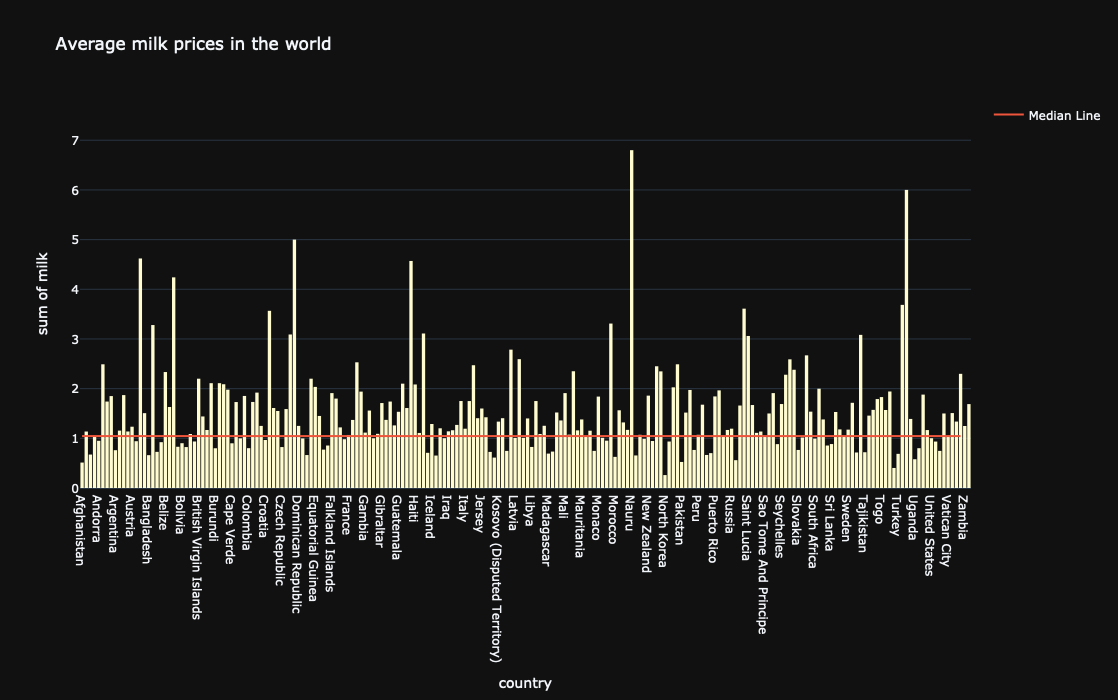

In [347]:
df_temp_milk = df[["country", "milk"]]
df_temp_milk = df_temp_milk.dropna(subset = ["milk"])
fig = px.histogram(df_temp_milk.groupby(["country"]).mean().reset_index(), range_y = [0, df['milk'].max() + 1], x = "country", y="milk",
                   title="Average milk prices in the world", color_discrete_sequence = ["#fffdd0"])
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df['milk'].median(), df['milk'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1100, height=700)

<body>
    <h2>Bread</h2>
</body>

In [ ]:
print("Minimum price: " + str(df['bread'].min()) + "$")
print("Median price: " + str(df['bread'].median()) + "$")
print("Maximum price: " + str(df['bread'].max()) + "$")

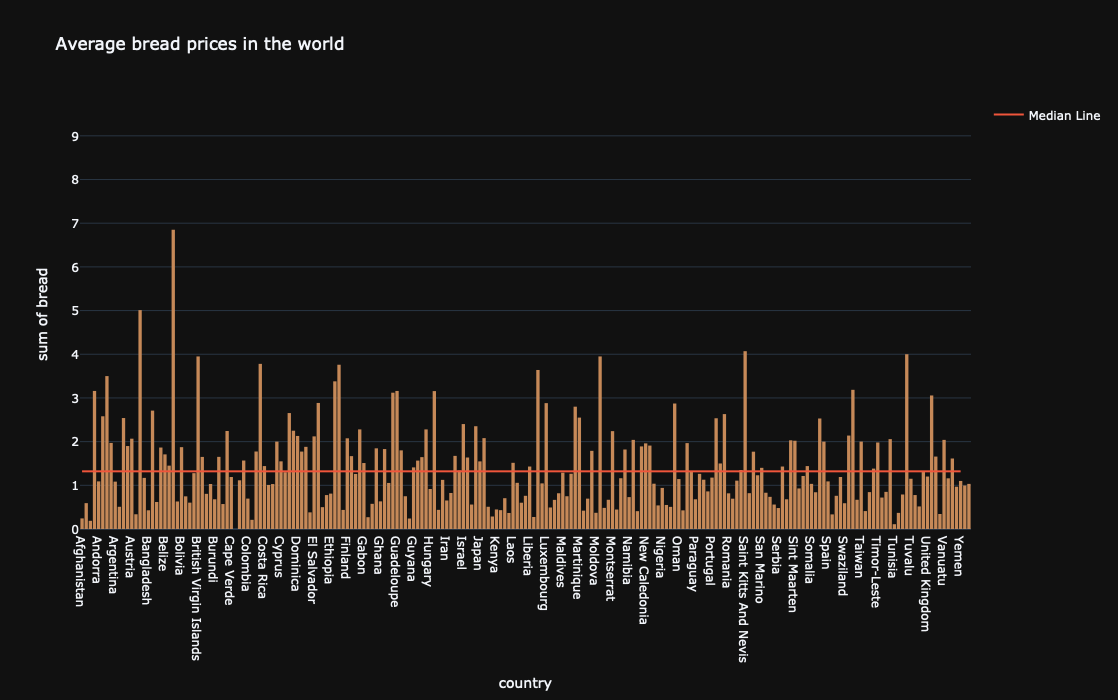

In [346]:
df_temp_bread = df[["country", "bread"]]
df_temp_break = df_temp_bread.dropna(subset = ["bread"])
fig = px.histogram(df_temp_bread.groupby(["country"]).mean().reset_index(), range_y = [0, df['bread'].max() + 1],  x = "country", y="bread",
                   title="Average bread prices in the world", color_discrete_sequence = ["#c68958"])
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df['bread'].median(), df['bread'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1100, height=700)
fig

<body>
    <h2>Eggs</h2>
</body>

In [ ]:
print("Minimum price: " + str(df['eggs'].min()) + "$")
print("Median price: " + str(df['eggs'].median()) + "$")
print("Maximum price: " + str(df['eggs'].max()) + "$")

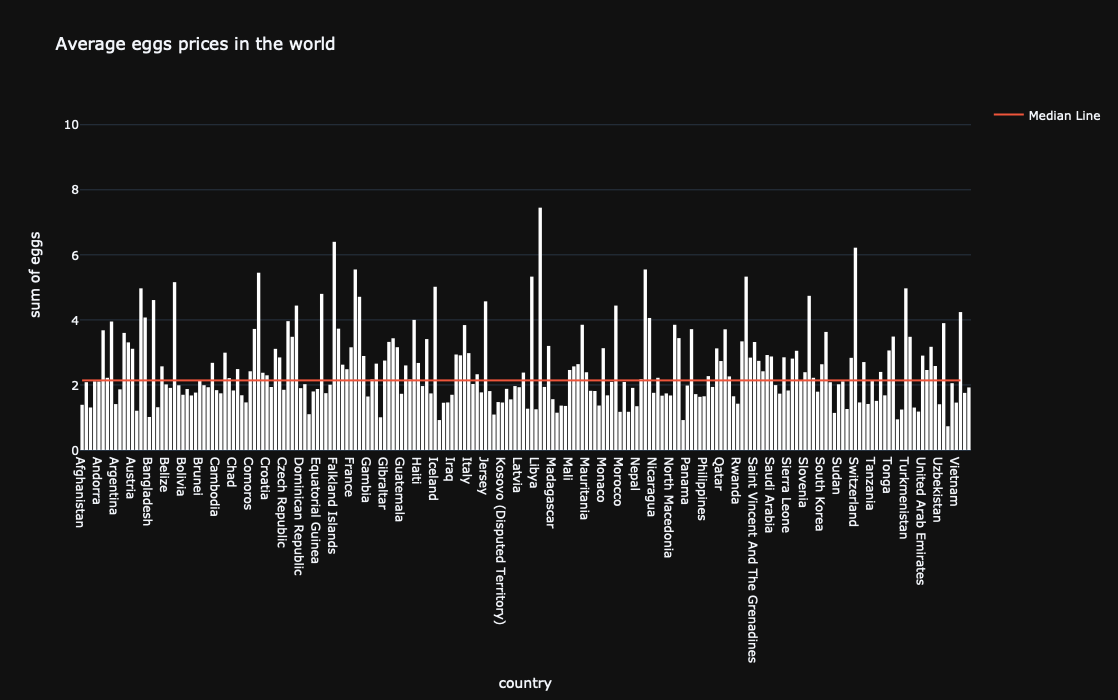

In [329]:
df_temp_eggs = df[["country", "eggs"]]
df_temp_eggs = df_temp_eggs.dropna(subset = ["eggs"])
fig = px.histogram(df_temp_eggs.groupby(["country"]).mean().reset_index(), range_y = [0, df['eggs'].max() + 1],  x = "country", y="eggs",
                   title="Average eggs prices in the world", color_discrete_sequence = ["#ffffff"])
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df['eggs'].median(), df['eggs'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1100, height=700)
fig

<body>
    <h2>Apples</h2>
</body>

In [ ]:
print("Minimum price: " + str(df['apple'].min()) + "$")
print("Median price: " + str(df['apple'].median()) + "$")
print("Maximum price: " + str(df['apple'].max()) + "$")

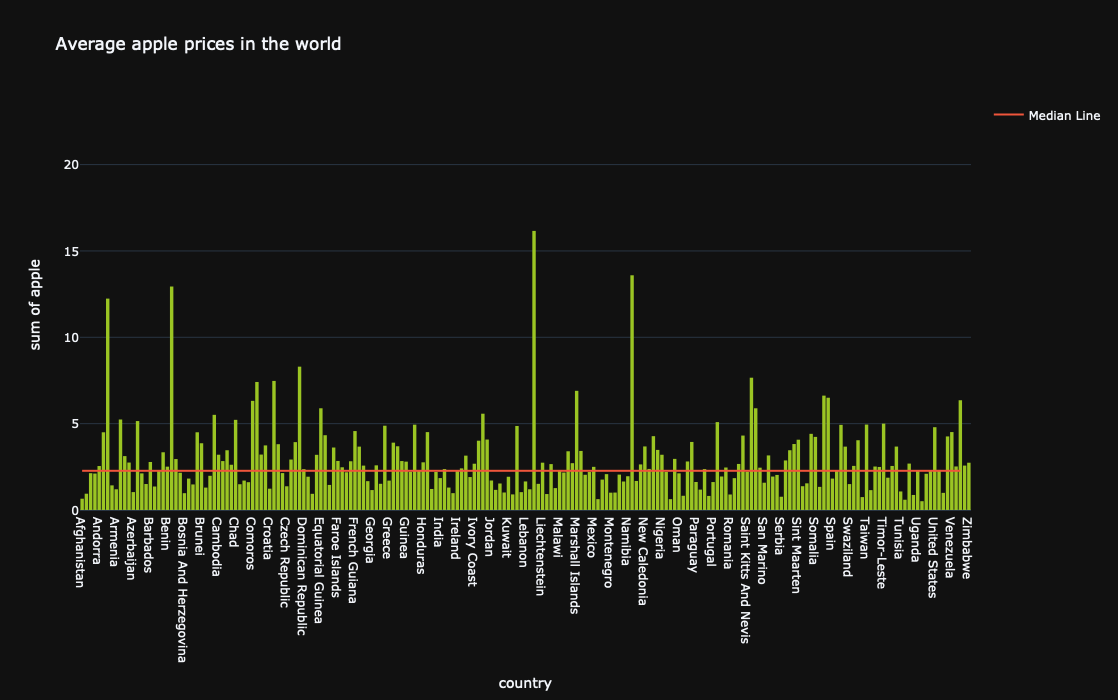

In [348]:
df_temp = df[["country", "apple"]]
df_temp = df_temp.dropna(subset = ["apple"])
fig = px.histogram(df_temp.groupby(["country"]).mean().reset_index(), range_y = [0, df['apple'].max() + 1],  x = "country", y="apple",
                   title="Average apple prices in the world", color_discrete_sequence = ["#9bc523"])
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df['apple'].median(), df['apple'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1100, height=700)
fig

<body>
    <h2>Potatoes</h2>
</body>

In [ ]:
print("Minimum price: " + str(df['potato'].min()) + "$")
print("Median price: " + str(df['potato'].median()) + "$")
print("Maximum price: " + str(df['potato'].max()) + "$")

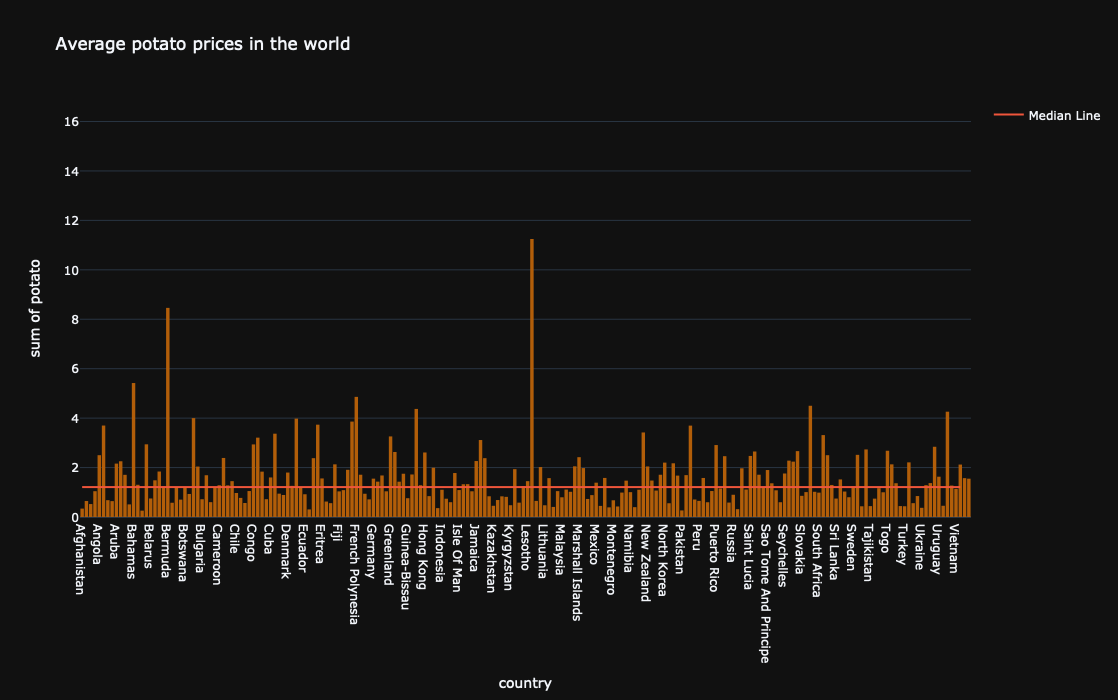

In [349]:
df_temp = df[["country", "potato"]]
df_temp = df_temp.dropna(subset = ["potato"])
fig = px.histogram(df_temp.groupby(["country"]).mean().reset_index(), range_y = [0, df['potato'].max() + 1], x = "country", y="potato",
                   title="Average potato prices in the world", color_discrete_sequence=["#b25e09"])
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df['potato'].median(), df['potato'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1100, height=700)
fig

<body>
    <h2>Water</h2>
</body>

In [360]:
print("Minimum price: " + str(df['water'].min()) + "$")
print("Median price: " + str(df['water'].median()) + "$")
print("Maximum price: " + str(df['water'].max()) + "$")

Minimum price: 0.11$
Median price: 0.76$
Maximum price: 5.0$


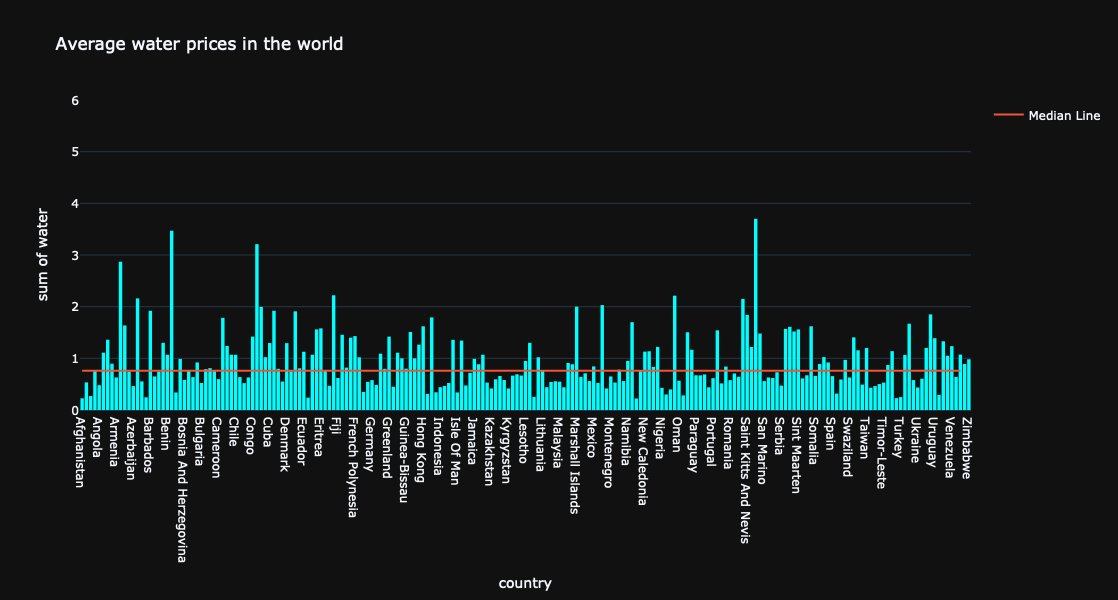

In [361]:
df_temp = df[["country", "water"]]
df_temp = df_temp.dropna(subset = ["water"])
fig = px.histogram(df_temp.groupby(["country"]).mean().reset_index(), range_y = [0, df['water'].max() + 1], x = "country", y="water",
                   title="Average water prices in the world", color_discrete_sequence=["aqua"])
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df['water'].median(), df['water'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1000, height=600)
fig

<body>
    <div id = "cheap">
        <p>It can be noticed, that <strong>the highest prices</strong> on the main basic products like milk, egg, etc. <br>
            are mainly met in Oceania and the countries in area of North America:</p>
            <ul>
                <li>Nauru</li>
                <li>Cook islands</li>
                <li>Antigua and Barbuda</li>
                <li>Saint Vincent and The Grenadines,</li>
                <li>Bermuda,</li>
                <li>Bahamas, etc.</li>
            </ul>
    <div id = "expensive">
        <p>It's also worth-mentioning, that <strong>the cheapest prices</strong> on the main basic products <br>
            are mainly met in asian, african and europian countries like:</p>
            <ul>
                <li>Afghanistan</li>
                <li>Turkmenistan</li>
                <li>Bangladesh</li>
                <li>Bhutan</li>
                <li>Gambia</li>
                <li>Ghana</li>
                <li>Germany</li>
                <li>Albania</li>
                <li>Croatia</li>
                <li>Hungary, etc.</li>
            </ul><br>
    <div id = "outlier">
        <h4>It's evident from the histogram that prices in Liberia are much higher than in the rest of the world, therefore I've<br>
            made a slight fact-checking and it turned out, that the data for Liberia is spoiled and it can be marked as an outlier.<br>
            It will influence the median values for other countries, so I'm not to spoil mean ratio, that's why I'll drop it. </h4>
    <div id = "conclusion">
        <h4>It's noticable, that regions with the highest prices are mostly remote areas like islands,<br>
            and shipping products may be more expensive, than transportation in other countries is, then my hypothesis is aprroved.</h4>
        <h3>That's why my hypothesis is appoved.</h3>
</body>

In [366]:
df = df[~df["country"].str.contains("Liberia")]

<body>
    <h2>What about some junk food like coke, McDonald's and BEER?<h2>
</body>

<body>
    <h2>Coke</h2>
</body>

In [ ]:
print("Minimum price: " + str(df['coke'].min()) + "$")
print("Median price: " + str(df['coke'].median()) + "$")
print("Maximum price: " + str(df['coke'].max()) + "$")

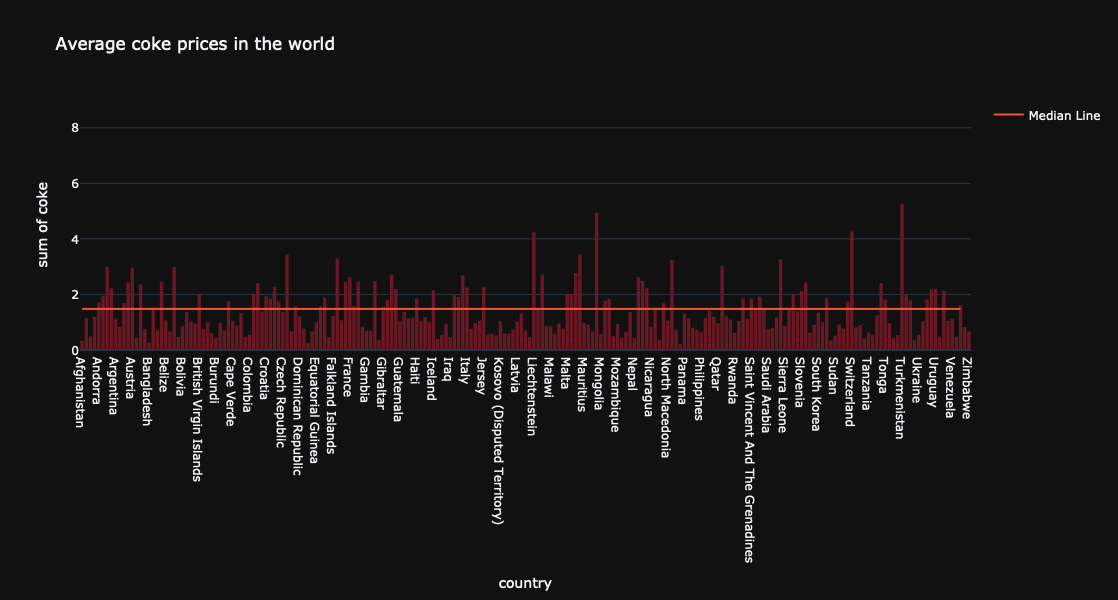

In [370]:
df_temp = df[["country", "coke"]]
df_temp = df_temp.dropna(subset = ["coke"])
fig = px.histogram(df_temp.groupby(["country"]).mean().reset_index(), range_y = [0, df['coke'].max() + 1], x = "country", y="coke",
                   title="Average coke prices in the world", color_discrete_sequence=["#6a1823"])
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df['coke'].median(), df['coke'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1000, height=600)
fig

<body>
    <h2>McDonald's</h2>
    <h4>Hypothesis: It may seem quite obvious, that if McDonald's was founded in the USA, <br>
        then prices in the "mother-country" are lower, than in the rest of the world.</h4><br>
    <h3>But is it true? Let's check it.</h3>
</body>

In [372]:
df_temp = df[["country", "mcdonalds"]]
df_temp.groupby(["country"]).mean().reset_index()

,country,mcdonalds
0,Afghanistan,2.977500
1,Albania,4.223333
2,Algeria,2.830000
3,American Samoa,22.130000
4,Andorra,7.010000
...,...,...
209,Venezuela,9.021765
210,Vietnam,4.231429
211,Yemen,11.158333
212,Zambia,3.170000


<body>
    <h4>Let's display the medium price of McCombo meal over the world</h4>
</body>

In [374]:
print("Median price: " + str(df['mcdonalds'].median()) + "$")

Median price: 6.985$


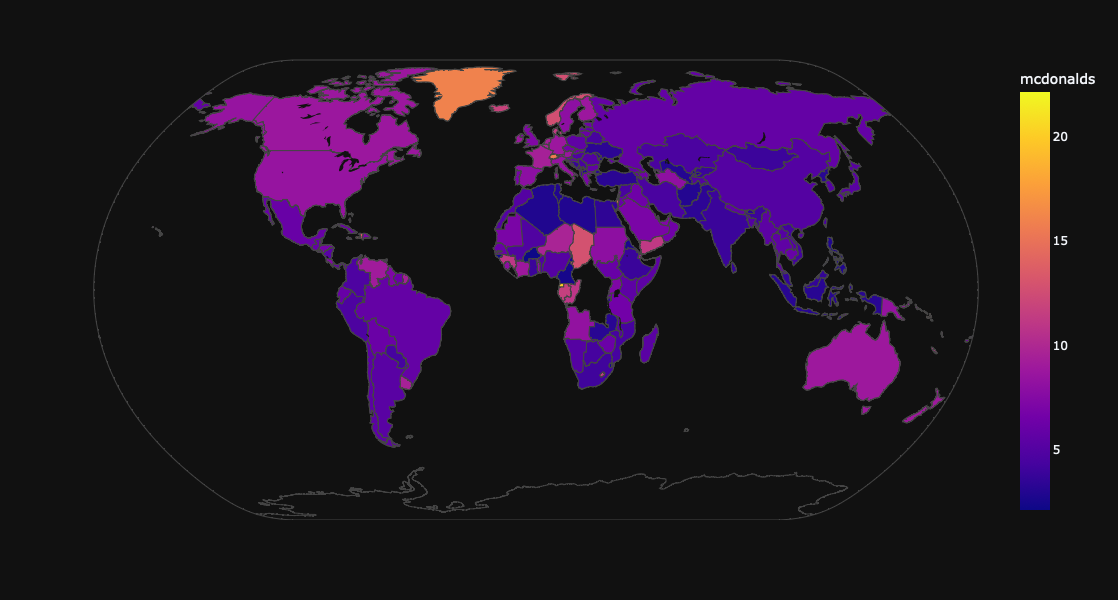

In [373]:
fig = px.choropleth(df_temp.groupby(["country"]).mean().reset_index(), locations="country", color="mcdonalds", hover_name="country",
                     projection="natural earth", locationmode="country names", color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(template="plotly_dark", width=1000, height=600)
fig.show()

<body>
    <h4>It is noticable, that in the USA the average price of McCombo meal at McDonald's is a little higher <br>
        (World median price equals 6.99 USD, while the USA median price is 8.43 USD), than in the rest of the world
        that is why the hypothesis is denied.</h4>
</body>

<body>
    <h2>Beer</h2>
    <h4>Let's see, in which countries there is no difference - to buy beer from market or to order it in restaurant -<br>
    and in which countries you can afford even several portions of market beer by refusing to order one glass of beer in restaurant.</h4>
</body>

Domestic beer from market

In [375]:
print("Minimum price: " + str(df['domestic_beer_market'].min()) + "$")
print("Median price: " + str(df['domestic_beer_market'].median()) + "$")
print("Maximum price: " + str(df['domestic_beer_market'].max()) + "$")

Minimum price: 0.25$
Median price: 1.43$
Maximum price: 7.67$


Domestic beer from restaurant

In [376]:
print("Minimum price: " + str(df['domestic_beer_rest'].min()) + "$")
print("Median price: " + str(df['domestic_beer_rest'].median()) + "$")
print("Maximum price: " + str(df['domestic_beer_rest'].max()) + "$")

Minimum price: 0.33$
Median price: 3.0$
Maximum price: 20.6$


In [377]:
df_temp = df[["country", "domestic_beer_market", "domestic_beer_rest"]]
df_temp = df_temp.dropna(subset = ["domestic_beer_market", "domestic_beer_rest"])
df_temp = df_temp.groupby(["country"]).mean().reset_index()
df_temp

,country,domestic_beer_market,domestic_beer_rest
0,Afghanistan,1.1300,2.260000
1,Albania,0.8180,1.378667
2,Algeria,1.3775,1.455417
3,Andorra,1.0500,2.110000
4,Angola,0.7800,2.200000
...,...,...,...
199,Venezuela,1.1325,1.470000
200,Vietnam,0.7720,0.788667
201,Yemen,0.7000,3.060000
202,Zambia,0.9460,1.152000


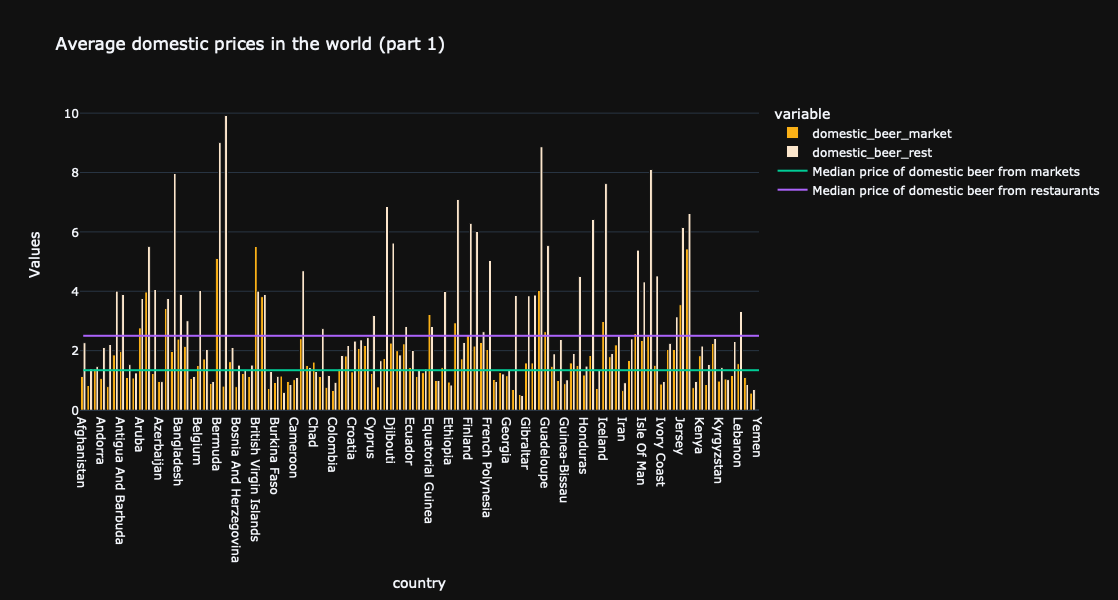

In [380]:
df_temp = df[["country", "domestic_beer_market", "domestic_beer_rest"]]
df_temp = df_temp.dropna(subset = ["domestic_beer_market", "domestic_beer_rest"])
df_temp = df_temp[(df_temp['country'] <= 'Libya')]

fig = px.bar(df_temp.groupby(["country"]).mean().reset_index(),
             x='country',
             y=['domestic_beer_market', 'domestic_beer_rest'],
             labels={'value': 'Values'}, 
             title='Average domestic prices in the world (part 1)',
             color_discrete_map={'domestic_beer_market': '#fbb117', 'domestic_beer_rest': '#fce6cc'},
             barmode='group')
fig.update_layout(template="plotly_dark", width=1100, height=600)
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df_temp['domestic_beer_market'].median(), df_temp['domestic_beer_market'].median()], mode='lines', name='Median price of domestic beer from markets')
fig.add_scatter(x = ["Afghanistan", "Yemen"], y=[df_temp['domestic_beer_rest'].median(), df_temp['domestic_beer_rest'].median()], mode='lines', name='Median price of domestic beer from restaurants')

fig.show()

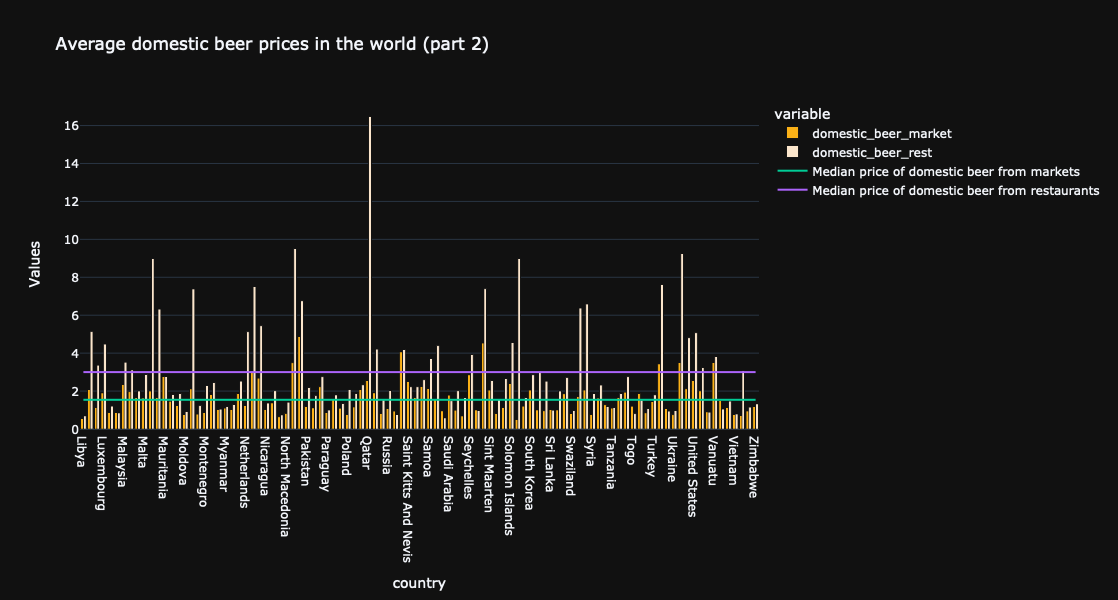

In [381]:
df_temp = df[["country", "domestic_beer_market", "domestic_beer_rest"]]
df_temp = df_temp.dropna(subset = ["domestic_beer_market", "domestic_beer_rest"])
df_temp = df_temp[(df_temp['country'] >= 'Libya')]

fig = px.bar(df_temp.groupby(["country"]).mean().reset_index(),
             x='country',
             y=['domestic_beer_market', 'domestic_beer_rest'],
             labels={'value': 'Values'}, 
             title='Average domestic beer prices in the world (part 2)',
             color_discrete_map={'domestic_beer_market': '#fbb117', 'domestic_beer_rest': '#fce6cc'},
             barmode='group')
fig.update_layout(template="plotly_dark", width=1100, height=600)
fig.add_scatter(x = ["Libya", "Zimbabwe"], y=[df_temp['domestic_beer_market'].median(), df_temp['domestic_beer_market'].median()], mode='lines', name='Median price of domestic beer from markets')
fig.add_scatter(x = ["Libya", "Zimbabwe"], y=[df_temp['domestic_beer_rest'].median(), df_temp['domestic_beer_rest'].median()], mode='lines', name='Median price of domestic beer from restaurants')

fig.show()

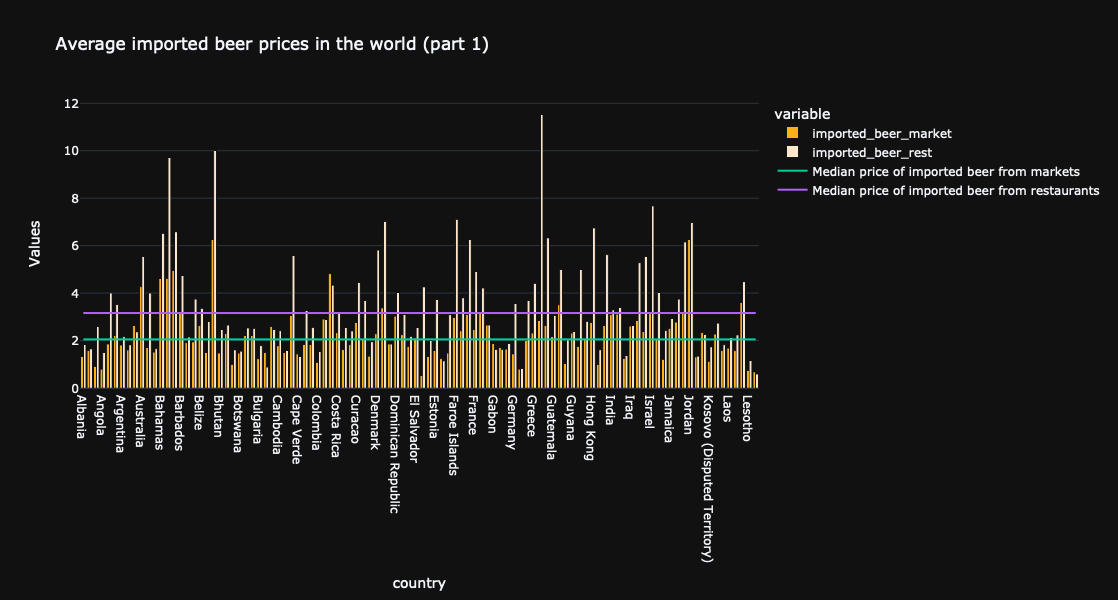

In [382]:
df_temp = df[["country", "imported_beer_market", "imported_beer_rest"]]
df_temp = df_temp.dropna(subset = ["imported_beer_market", "imported_beer_rest"])
df_temp = df_temp[(df_temp['country'] <= 'Libya')]

fig = px.bar(df_temp.groupby(["country"]).mean().reset_index(),
             x='country',
             y=['imported_beer_market', 'imported_beer_rest'],
             labels={'value': 'Values'}, 
             title='Average imported beer prices in the world (part 1)',
             color_discrete_map={'imported_beer_market': '#fbb117', 'imported_beer_rest': '#fce6cc'},
             barmode='group')
fig.update_layout(template="plotly_dark", width=1100, height=600)
fig.add_scatter(x = ["Albania", "Libya"], y=[df_temp['imported_beer_market'].median(), df_temp['imported_beer_market'].median()], mode='lines', name='Median price of imported beer from markets')
fig.add_scatter(x = ["Albania", "Libya"], y=[df_temp['imported_beer_rest'].median(), df_temp['imported_beer_rest'].median()], mode='lines', name='Median price of imported beer from restaurants')

fig.show()

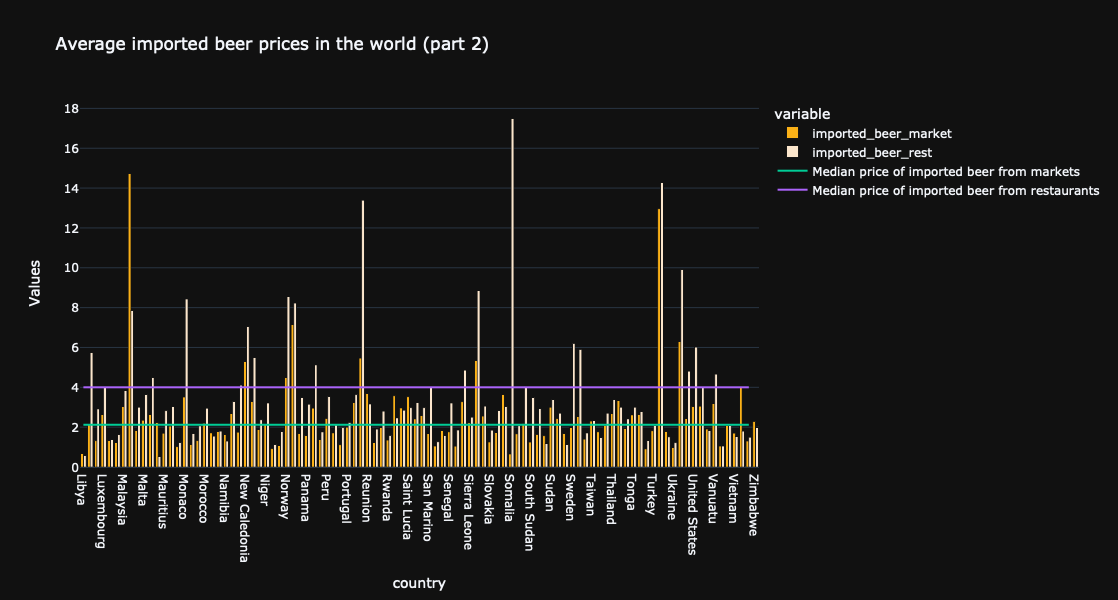

In [384]:
df_temp = df[["country", "imported_beer_market", "imported_beer_rest"]]
df_temp = df_temp.dropna(subset = ["imported_beer_market", "imported_beer_rest"])
df_temp = df_temp[(df_temp['country'] >= 'Libya')]

fig = px.bar(df_temp.groupby(["country"]).mean().reset_index(),
             x='country',
             y=['imported_beer_market', 'imported_beer_rest'],
             range_x = ["Afghanistan", "Brunei"],
             labels={'value': 'Values'}, 
             title='Average imported beer prices in the world (part 2)',
             color_discrete_map={'imported_beer_market': '#fbb117', 'imported_beer_rest': '#fce6cc'},
             barmode='group')
fig.update_layout(template="plotly_dark", width=1100, height=600)
fig.add_scatter(x = ["Libya", "Zambia"], y=[df_temp['imported_beer_market'].median(), df_temp['imported_beer_market'].median()], mode='lines', name='Median price of imported beer from markets')
fig.add_scatter(x = ["Libya", "Zambia"], y=[df_temp['imported_beer_rest'].median(), df_temp['imported_beer_rest'].median()], mode='lines', name='Median price of imported beer from restaurants')

fig.show()

<body>
    <h4>It's obvious from the histogram, that mostly (as is was expected), ordering any kind of beer (0.33l) <br>
        from restaurant is more expensive than buying a bottle of beer from market (0.5l), and mostly price difference is not that serious. <br><br>
        But some countries break these rules! <br></h4>
        <h5><ul>
            <li>For example, in Maldives ordering beer from restaurant is twice cheaper than buying it from market.</li> <br>
            <li>And, for instance, in Somalia 27 0.5l bottles of imported beer are equivalent to one 0.33 bottle of the same beer.</li> <br>
            <li>Simillar situations are in Bhutan, where you can afford almost 13 bottles of domestic beer from market <br>
                instead of ordering one 0.33l bottle in restaurant, and in Qatar, where 8 0.5l bottles of domestic beer from market <br>
                are equal in price with one 0.33l bottle of domestic beer from restaurant</li>
        </ul></h5>
</body>

## Where is it cheaper to get nicotine addiction? Let's see

In [404]:
print("Minimum price: " + str(df['cigarettes'].min()) + "$")
print("Median price: " + str(df['cigarettes'].median()) + "$")
print("Maximum price: " + str(df['cigarettes'].max()) + "$")

Minimum price: 0.45$
Median price: 5.27$
Maximum price: 57.14$


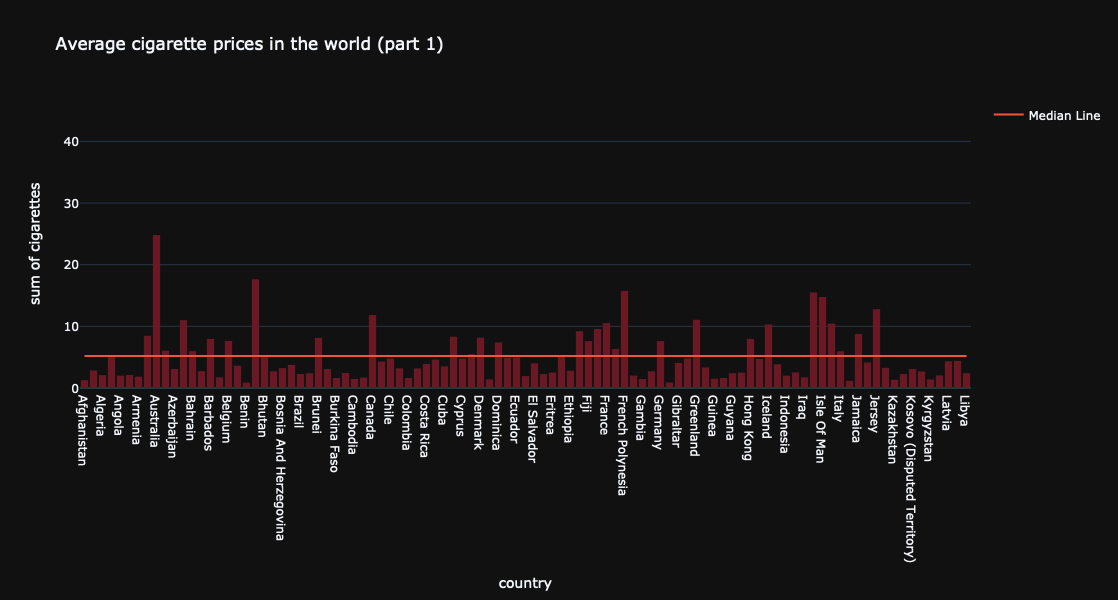

In [474]:
df_temp = df[["country", "cigarettes"]]
df_temp = df_temp.dropna(subset = ["cigarettes"])
df_temp = df_temp[(df_temp['country'] <= 'Libya')]

fig = px.histogram(df_temp.groupby(["country"]).mean().reset_index(), range_y = [0, df['cigarettes'].max() + 1], x = "country", y="cigarettes",
                   title="Average cigarette prices in the world (part 1)", color_discrete_sequence=["#6a1823"])
fig.add_scatter(x = ["Afghanistan", "Libya"], y=[df['cigarettes'].median(), df['cigarettes'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1000, height=600)
fig

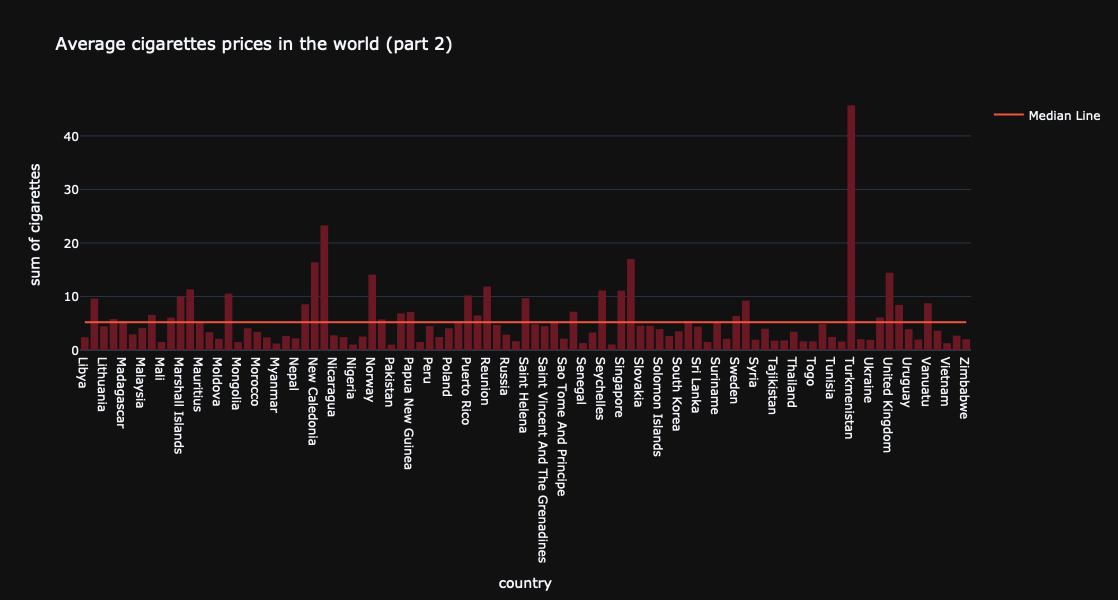

In [475]:
df_temp = df[["country", "cigarettes"]]
df_temp = df_temp.dropna(subset = ["cigarettes"])
df_temp = df_temp[(df_temp['country'] >= 'Libya')]

fig = px.histogram(df_temp.groupby(["country"]).mean().reset_index(), range_y = [0, df['cigarettes'].max() + 1], x = "country", y="cigarettes",
                   title="Average cigarettes prices in the world (part 2)", color_discrete_sequence=["#6a1823"])
fig.add_scatter(x = ["Libya", "Zimbabwe"], y=[df['cigarettes'].median(), df['cigarettes'].median()], mode='lines', name='Median Line')
fig.update_layout(template="plotly_dark", width=1000, height=600)

<body><h4>Therefore, it can be claimed, that Oceania is the area of the most expensive cigarettes in the world, whereas the cheapest cigarettes can be found in Asia, Africa and South America. In Europe the prices area bit higher than the mean value, but not that critical. <br><br>
    It's evident from the histogram that prices in Liberia are much higher than in the rest of the world, therefore I've made a slight fact-checking and it turned out, that the data for Liberia is spoiled and it can be marked as an outlier. It will influence the median values for other countries, so I'm not to spoil mean ratio, that's why I'll drop it.</h4></body>


## Now, as an ending of the project, let's imagine a situation: consider several countries from the most different parts of our world and compare, which basics can afford an average tourist having 50 USD. I'll consider 6 countries: Russia, Italy, USA, Australia, Japan, Chile.

In [443]:
df_temp = df[["country", "cheap_rest", "apartment", "internet", "cigarettes", "jeans", "nike_shoes"]]
df_temp = df_temp[df_temp['country'].isin(['Russia', "United States", "Italy", "Australia", "Japan", "Chile"])]
df_temp = df_temp.dropna(subset = ["country", "cheap_rest", "apartment", "internet", "cigarettes", "jeans", "nike_shoes"])
df_temp = df_temp.groupby(["country"]).mean()
df_temp

,cheap_rest,apartment,internet,cigarettes,jeans,nike_shoes
country,,,,,,
Australia,14.521515,942.462121,52.123333,24.090606,67.949091,96.115152
Chile,6.848333,337.993889,25.685556,4.777778,42.910000,51.106667
Italy,15.038571,461.228095,29.442095,5.961333,77.500571,88.158381
Japan,6.315111,439.107556,34.146444,4.136667,43.493333,60.476667
Russia,10.113371,266.827640,8.945618,2.853258,84.105393,100.189213
United States,16.771972,1232.963592,69.279349,8.430599,44.821356,78.338380


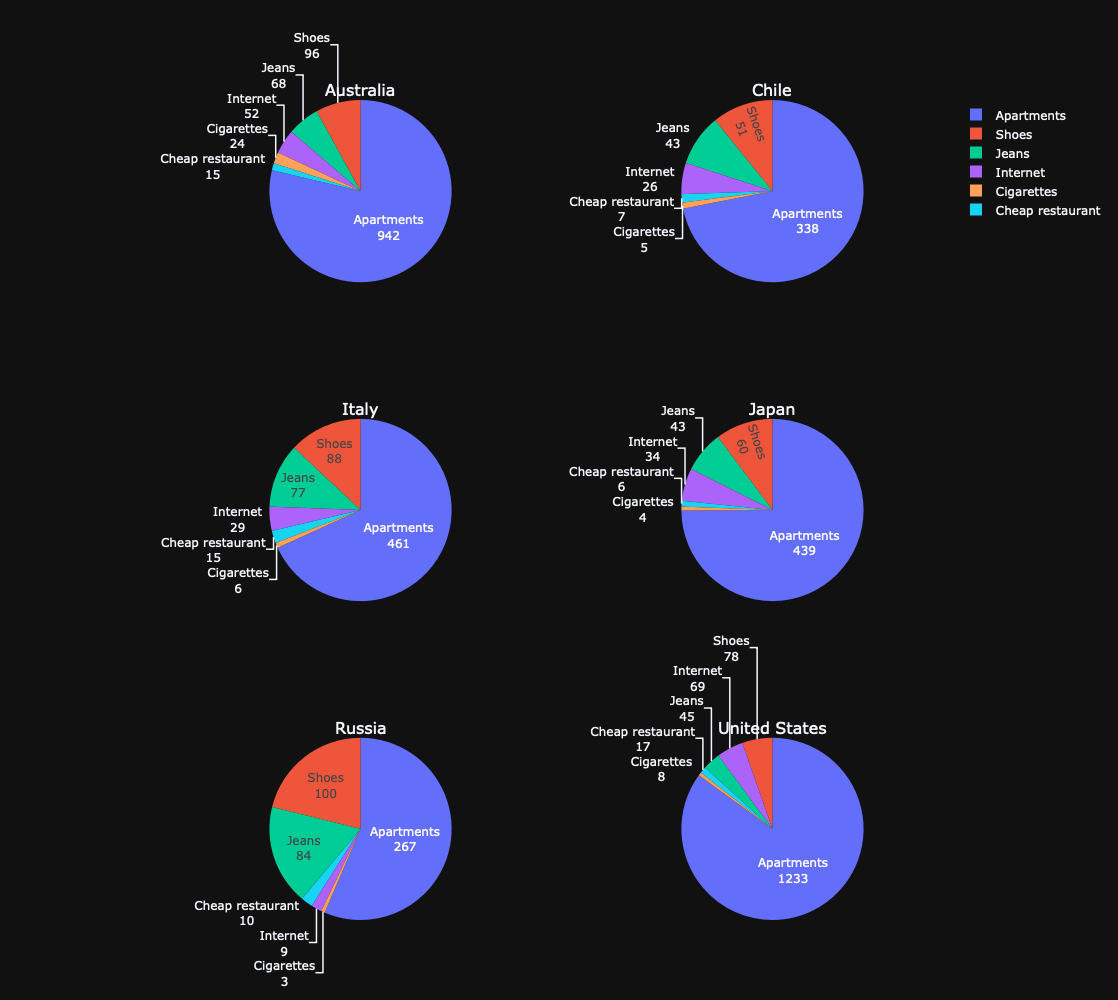

In [471]:
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, {"type": "pie"}]], 
    subplot_titles=("Australia", "Chile", "Italy", "Japan", "Russia", "United States"))
names = ["Cheap restaurant", "Apartments", "Internet", "Cigarettes", "Jeans", "Shoes"]
fig.add_trace(go.Pie(values=[15, 942, 52, 24, 68, 96], labels = names, textinfo='label+value'), row=1, col=1)
fig.add_trace(go.Pie(values=[7, 338, 26, 5, 43, 51], labels = names, textinfo='label+value'), row=1, col=2)
fig.add_trace(go.Pie(values=[15, 461, 29, 6, 77, 88], labels = names, textinfo='label+value'), row=2, col=1)
fig.add_trace(go.Pie(values=[6, 439, 34, 4, 43, 60], labels = names, textinfo='label+value'), row=2, col=2)
fig.add_trace(go.Pie(values=[10, 267, 9, 3, 84, 100], labels = names, textinfo='label+value'), row=3, col=1)
fig.add_trace(go.Pie(values=[17, 1233, 69, 8, 45, 78], labels = names, textinfo='label+value'), row=3, col=2)

fig.update_layout(template="plotly_dark", width=1100, height=1000)
fig

<body>
    <h3>Now let's compare all the categories separately:</h3>
    <ul>
        <h5><li>The cheapest apartments and internet can be found in Russia, but meanwhile buying clothes there is quite expensive comparing to other countrues</li>
            <li>The most expensive country for tourism is the United States</li>
            <li>Italy and Japan almost have the same price range</li>
            <li>Australia is the second most expensive place to visit as a tourist</li></h5>
</body>